<a href="https://colab.research.google.com/github/prestontechnology/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_112_Make_Features_lecture_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 2*

---

# Make Features 

- Student should be able to understand the purpose of feature engineering
- Student should be able to work with strings in pandas
- Student should be able to work with dates and times in pandas
- Student should be able to filter a dataframe based on conditions
- Student should be able to modify or create columns of a dataframe using the `.apply()` function


Helpful Links:
- [Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-11-01 02:57:48--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [              <=>   ]  21.62M   429KB/s    in 52s     

2019-11-01 02:58:41 (423 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22667400]



In [0]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [0]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4122.15","4122.15","2081.76","2081.76","1477.85","603.91","0.0","0.0","0.0","Sep-2019","190.21","Oct-2019","Sep-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,...,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,...,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,...,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10400,10400,10400.0,36 months,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,...,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,36266.741552,36266.74,...,66.7,0,0,516204,82514,59700,51904,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# what is the shape of my file?
print(df.shape)
print(df.columns)

(128412, 144)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)


In [0]:
df.shape

(128412, 144)

In [0]:
# How much missing data do I have?
pd.options.display.max_rows=999
pd.options.display.max_columns=100

df.isnull().sum().sort_values(ascending=False)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128345
hardship_type                                 128343
hardship_last_payment_amount                  128343
hardship_payoff_balance_amount                128343
hardship_reason                               128343
hardship_loan_status                          128343
hardship_dpd                                  128343
hardship_length                               128343
payment_plan_start_date                       128343
hardship_end_date                             128343
hardship_start_date                           128343
hardship_amount                               128343
deferral_term                                 128343
hardship_status                               128343
settlement_percentage                         

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [0]:
# Let's identify a column that shouldn't be a string.
df['int_rate'].head()

0     14.47%
1     16.14%
2     11.31%
3     12.98%
4     12.98%
Name: int_rate, dtype: object

In [0]:
# what is the data type of this column?
df['int_rate'].dtype

dtype('O')

In [0]:
# what is the value of the first cell in this column?
int_rate0=df.loc[0, 'int_rate']
print(int_rate0)
int_rate0

 14.47%


' 14.47%'

In [0]:
# we need a python method for removing string values
int_rate0.strip()

'14.47%'

In [0]:
# get rid of the percent sign
int_rate0.strip('%')

' 14.47'

In [0]:
# get rid of both using "chained methods"
int_rate0.strip().strip('%')

'14.47'

In [0]:
# which version of pandas?
pd.__version__

'0.25.2'

In [0]:
# Finally, we can now convert from string to float
float(int_rate0.strip().strip('%'))

14.47

In [0]:
# confirm that did what we wanted
print(type(int_rate0.strip().strip('%')))
print(type(float(int_rate0.strip().strip('%'))))


<class 'str'>
<class 'float'>


### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
# write your function
def int_rate_2_float(mystring):
  return float(mystring.strip().strip('%'))

In [0]:
# test your function
int_rate_2_float(int_rate0)

14.47

Apply the function to the `int_rate` column

In [0]:
# apply your function to the whole columns
df['int_rate_float']=df['int_rate'].apply(int_rate_2_float)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_float'],
      dtype='object', length=145)

In [0]:
# compare the old and new columns
df[['int_rate', 'int_rate_float']].head()

,int_rate,int_rate_float
0,14.47%,14.47
1,16.14%,16.14
2,11.31%,11.31
3,12.98%,12.98
4,12.98%,12.98


In [0]:
# confirm that we can now employ math on this
df['int_rate_double']=df['int_rate_float']*2
df[['int_rate', 'int_rate_float', 'int_rate_double']].sample(5)

,int_rate,int_rate_float,int_rate_double
66552,8.81%,8.81,17.62
58776,16.91%,16.91,33.82
42282,10.72%,10.72,21.44
37015,20.89%,20.89,41.78
65050,10.33%,10.33,20.66


### Clean `emp_title`

Look at top 20 titles

In [0]:
# Let's explore this column
df[['emp_title', 'int_rate']].sample(6)

,emp_title,int_rate
37517,cook,17.97%
30420,FORKLIFT OPERATOR,16.14%
121539,NaN,16.14%
102773,Manager,7.84%
65936,Driver,15.02%
8757,Assistant manager,13.56%


In [0]:
# brackets for columns
df[['emp_title', 'int_rate']].head()

,emp_title,int_rate
0,bus driver,14.47%
1,Production Manager,16.14%
2,Compliance Director,11.31%
3,Program Support Assistant,12.98%
4,Sr. Vice President -Risk Manager,12.98%


In [0]:
# what are all possible titles?
df['emp_title'].nunique()

43892

In [0]:
# Show the most popular titles
df['emp_title'].value_counts(ascending=False, dropna=False).head()

NaN                 20947
Teacher              2090
Manager              1773
Registered Nurse      952
Driver                924
Name: emp_title, dtype: int64

In [0]:
# woops, we got some nulls
df['emp_title'].isnull().sum()

20947

How often is `emp_title` null?

In [0]:
# see above.
df['emp_title'].notnull().sum()

107465

Clean the title and handle missing values

In [0]:
import numpy as np
type(np.NaN)

float

In [0]:
# Write a function to clean up our titles
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'Unknown'

examples=['owner', 'Supervisor', ' Project Manager', np.NaN]

for item in examples:
  print(clean_title(item))

Owner
Supervisor
Project Manager
Unknown


In [0]:
# Now that we've tested our function, let's apply it to the entire dataframe column.
df['emp_title_clean']=df['emp_title'].apply(clean_title)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_float',
       'int_rate_double', 'emp_title_clean'],
      dtype='object', length=147)

In [0]:
# compare old and new values
df[['emp_title', 'emp_title_clean']].sample(6)

,emp_title,emp_title_clean
41052,Director of Manufacturing,Director Of Manufacturing
124365,Office manager,Office Manager
177,Medical Technologist,Medical Technologist
88535,Gerenal manager,Gerenal Manager
20572,Sr. mechanic,Sr. Mechanic
17990,Manager,Manager


In [0]:
# check for missing data
df['emp_title_clean'].isnull().sum()

0

In [0]:
# how about them value counts?
df['emp_title_clean'].value_counts(ascending=False).head()

Unknown             20947
Teacher              2557
Manager              2395
Registered Nurse     1418
Driver               1258
Name: emp_title_clean, dtype: int64

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
df['emp_title_manager']=df['emp_title_clean'].str.contains('Manager')
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'int_rate_float', 'int_rate_double', 'emp_title_clean',
       'emp_title_manager'],
      dtype='object', length=148)

In [0]:
# Compare old and new
df[['emp_title_clean', 'emp_title_manager']].sample(4)

,emp_title_clean,emp_title_manager
77514,Physician,False
47420,Unknown,False
24727,Server,False
120982,Medical Assitent,False


In [0]:
# any missing?
df['emp_title_manager'].isnull().sum()

0

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [0]:
# list all columns and their data types
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [0]:
# which columns are dates?
for col in df.columns:
  if (col.endswith('_d')) or (col.endswith('_date')):
    print(col)

issue_d
last_pymnt_d
next_pymnt_d
last_credit_pull_d
hardship_start_date
hardship_end_date
payment_plan_start_date
debt_settlement_flag_date
settlement_date


In [0]:
# the pros do that with list comprehension
date_col_list = [col for col in df.columns if (col.endswith('_d')) or (col.endswith('_date'))]
print(date_col_list)

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date']


In [0]:
# what is their dtype?
df['issue_d'].dtype

dtype('O')

In [0]:
# Even though it looks like a date
df.loc[0:10, 'issue_d']

0     Dec-2018
1     Dec-2018
2     Dec-2018
3     Dec-2018
4     Dec-2018
5     Dec-2018
6     Dec-2018
7     Dec-2018
8     Dec-2018
9     Dec-2018
10    Dec-2018
Name: issue_d, dtype: object

In [0]:
# Let's convert those strings to dates
df['issue_d_clean']=pd.to_datetime(df['issue_d'], infer_datetime_format=True)

# compare
df[['issue_d', 'issue_d_clean']].head()

,issue_d,issue_d_clean
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [0]:
# check the type
df['issue_d_clean'].dtype

dtype('<M8[ns]')

In [0]:
# now we can create some new values
df['year']=df['issue_d_clean'].dt.year

# compare
df[['issue_d_clean', 'year']].sample(6)

,issue_d_clean,year
103012,2018-10-01,2018
117091,2018-10-01,2018
28665,2018-12-01,2018
1462,2018-12-01,2018
30737,2018-12-01,2018
1551,2018-12-01,2018


In [0]:
# Let's create a few more
df['month']=df['issue_d_clean'].dt.month

# compare
df[['issue_d_clean', 'month']].sample(6)

,issue_d_clean,month
63121,2018-11-01,11
482,2018-12-01,12
3707,2018-12-01,12
92224,2018-10-01,10
37668,2018-12-01,12
100959,2018-10-01,10


In [0]:
# Weekday
df['weekday']=df['issue_d_clean'].dt.weekday

# compare
df[['issue_d_clean', 'weekday']].sample(6)

,issue_d_clean,weekday
1646,2018-12-01,5
69514,2018-11-01,3
22388,2018-12-01,5
62550,2018-11-01,3
93702,2018-10-01,0
66713,2018-11-01,3


## Filtering

In [0]:
# set of booleans
df['emp_title_manager']

0         False
1          True
2         False
3         False
4          True
          ...  
128407    False
128408    False
128409    False
128410    False
128411     True
Name: emp_title_manager, Length: 128412, dtype: bool

In [0]:
# Filter on that!
condition = df['emp_title_manager']==True

managers=df[condition]
managers.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,int_rate_double,emp_title_clean,emp_title_manager,issue_d_clean,year,month,weekday
1,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,...,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,32.28,Production Manager,True,2018-12-01,2018,12,5
4,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,36266.741552,36266.74,35000.00,1266.74,0.0,0.0,0.0,Apr-2019,34712.60,NaN,Sep-2019,0,...,1,97.4,66.7,0,0,516204,82514,59700,51904,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,25.96,Sr. Vice President -Risk Manager,True,2018-12-01,2018,12,5
8,NaN,NaN,12000,12000,12000.0,36 months,11.80%,397.43,B,B4,Transportation Manager,10+ years,RENT,79365.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,104xx,NY,29.70,0,Sep-1988,2,25.0,NaN,20,0,4957,27.8%,32,w,9383.91,9383.91,3565.070000,3565.07,2616.09,948.98,0.0,0.0,0.0,Sep-2019,397.43,Oct-2019,Sep-2019,0,...,7,81.3,0.0,0,0,103047,80734,6700,85247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.80,23.60,Transportation Manager,True,2018-12-01,2018,12,5
16,NaN,NaN,12000,12000,12000.0,36 months,16.14%,422.72,C,C4,Sales Account Manager,4 years,RENT,70000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,18.96,0,Nov-2013,0,NaN,NaN,6,0,13663,61.8%,7,w,9844.05,9844.05,3365.620000,3365.62,2155.95,1209.67,0.0,0.0,0.0,Sep-2019,422.72,Oct-2019,Sep-2019,0,...,2,100.0,66.7,0,0,56264,34470,18500,34164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,32.28,Sales Account Manager,True,2018-12-01,2018,12,5
18,NaN,NaN,20400,20400,20400.0,60 months,10.33%,436.76,B,B1,Bakery Manager,10+ years,MORTGAGE

In [0]:
# Two filters at once
(df['emp_title_manager']==False) & (df['home_ownership']=='OWN')

0          True
1         False
2         False
3         False
4         False
          ...  
128407    False
128408    False
128409    False
128410    False
128411    False
Length: 128412, dtype: bool

In [0]:
# apply that to the dataframe
subordinates=df[(df['emp_title_manager']==False) & (df['home_ownership']=='OWN')]

subordinates.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,int_rate_double,emp_title_clean,emp_title_manager,issue_d_clean,year,month,weekday
0,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.74,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,...,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,28.94,Bus Driver,False,2018-12-01,2018,12,5
14,NaN,NaN,1200,1200,1200.0,36 months,17.97%,43.37,D,D1,Haz Mat S/R,10+ years,OWN,52000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,vacation,Vacation,605xx,IL,25.61,0,Feb-1991,2,NaN,NaN,14,0,18197,48.3%,24,w,957.22,957.22,388.53,388.53,242.78,145.75,0.0,0.0,0.0,Sep-2019,43.37,Oct-2019,Sep-2019,0,...,3,100.0,66.7,0,0,50041,29964,15700,12341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,35.94,Haz Mat S/R,False,2018-12-01,2018,12,5
24,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,22294.87,22294.87,5260.23,5260.23,2705.13,2555.10,0.0,0.0,0.0,Sep-2019,587.82,Oct-2019,Sep-2019,0,...,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,28.94,Teacher,False,2018-12-01,2018,12,5
27,NaN,NaN,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,NaN,< 1 year,OWN,300000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,068xx,CT,17.43,1,Apr-2002,1,17.0,NaN,38,0,65950,49.8%,58,w,4880.90,4880.90,1644.28,1644.28,1119.10,525.18,0.0,0.0,0.0,Sep-2019,206.44,Oct-2019,Sep-2019,0,...,2,100.0,26.3,0,0,477390,105911,98300,89600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,28.94,Unknown,False,2018-12-01,2018,12,5
31,NaN,NaN,30000,30000,30000.0,60 months,26.31%,903.73,E,E4,Casino Host,10+ years,OWN,62000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,37.24,0,Oct-2007,0,NaN,86.0,15,1,18890,39.8%,36,w,0.00,0.00,2645.41,2645.41,754.

In [0]:
# Now we can look at some summary stats
managers['int_rate_float'].mean()

12.760582149647117

In [0]:
# what about subs?
subordinates['int_rate_float'].mean()

13.196840249959907

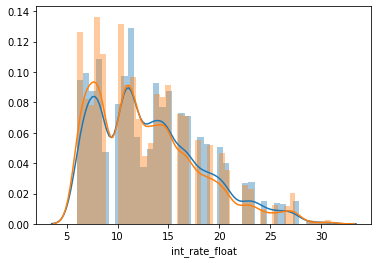

In [0]:
# Let's visualize that
import seaborn as sns
sns.distplot(subordinates['int_rate_float'])
sns.distplot(managers['int_rate_float'])